In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data
df = pd.read_csv(r"C:\Users\user\Dropbox\PC\Desktop\Machine Learning\Relecura\dataset_1.csv")

In [3]:
df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,target
0,1,5.1,3.5,1.4,0.2,Class_1
1,2,4.9,3.0,1.4,0.2,Class_1
2,3,4.7,3.2,1.3,0.2,Class_1
3,4,4.6,3.1,1.5,0.2,Class_1
4,5,5.0,3.6,1.4,0.2,Class_1


In [4]:
df.shape

(150, 6)

In [5]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         150 non-null    int64  
 1   Feature_1  150 non-null    float64
 2   Feature_2  150 non-null    float64
 3   Feature_3  150 non-null    float64
 4   Feature_4  150 non-null    float64
 5   target     150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# there is no null values

# EDA

In [6]:
df.describe()

,Id,Feature_1,Feature_2,Feature_3,Feature_4
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.columns

Index(['Id', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'target'], dtype='object')

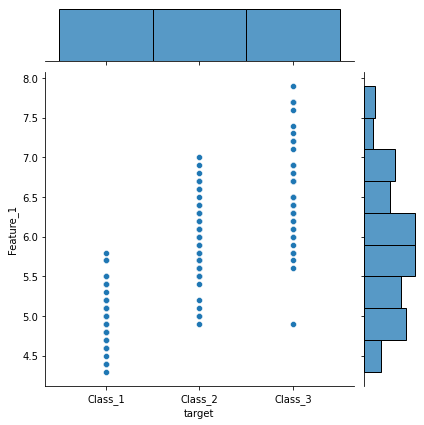

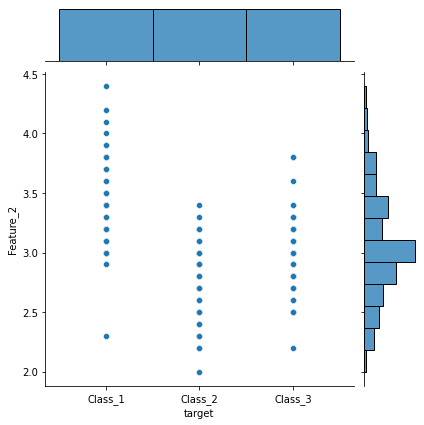

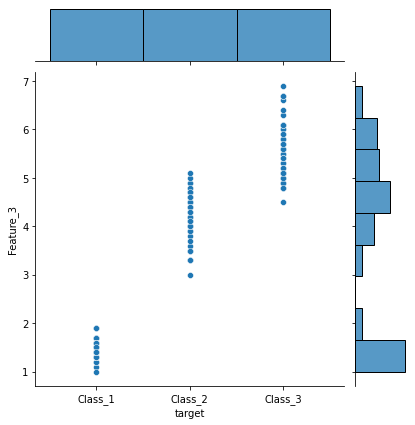

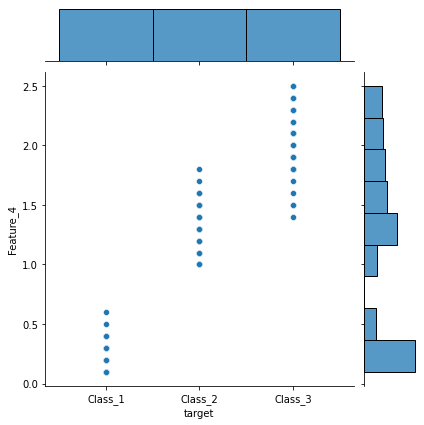

In [8]:
d1 = sns.jointplot(data=df, x='target', y='Feature_1')
d2 = sns.jointplot(data=df, x='target', y='Feature_2')
d3 = sns.jointplot(data=df, x='target', y='Feature_3')
d4 = sns.jointplot(data=df, x='target', y='Feature_4')

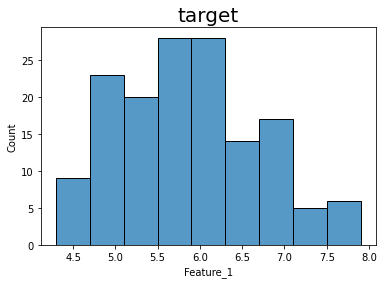

In [9]:
plt.title('target', fontsize=20)
hist1 = sns.histplot(df.Feature_1)

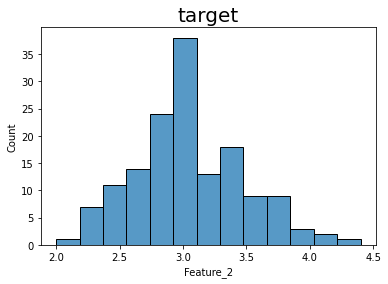

In [10]:
plt.title('target', fontsize=20)
hist2 = sns.histplot(df.Feature_2)

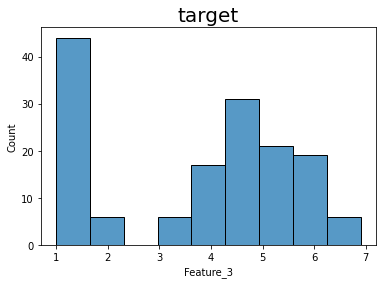

In [11]:
plt.title('target', fontsize=20)
hist3 = sns.histplot(df.Feature_3)

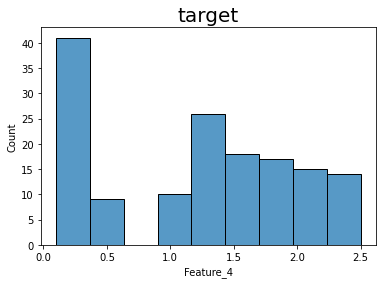

In [12]:
plt.title('target', fontsize=20)
hist4 = sns.histplot(df.Feature_4)

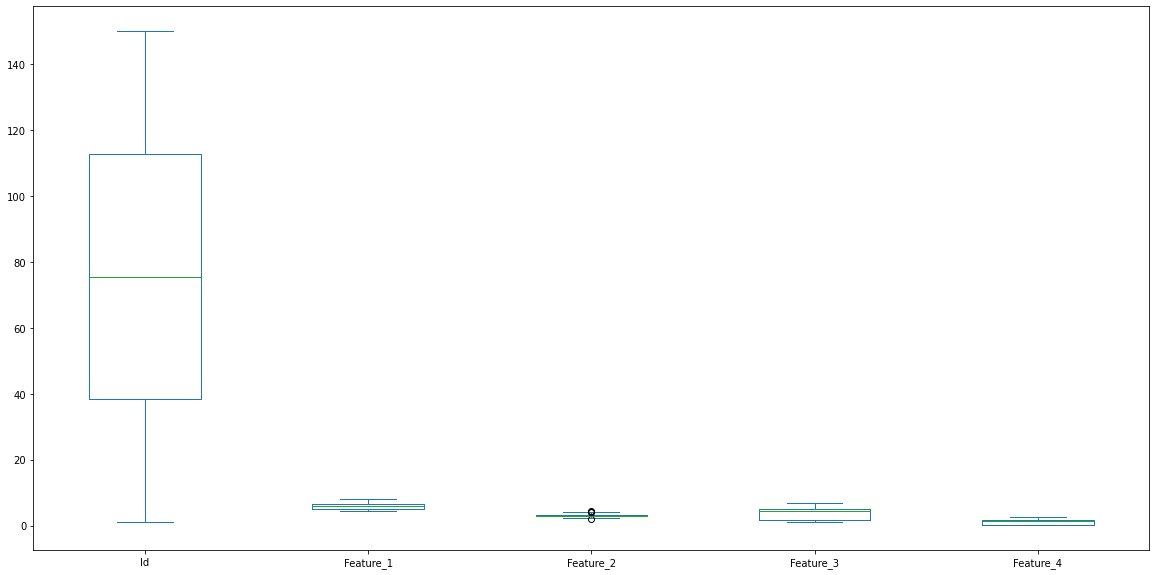

In [13]:
df.plot(kind='box',figsize=(20,10))
plt.show()

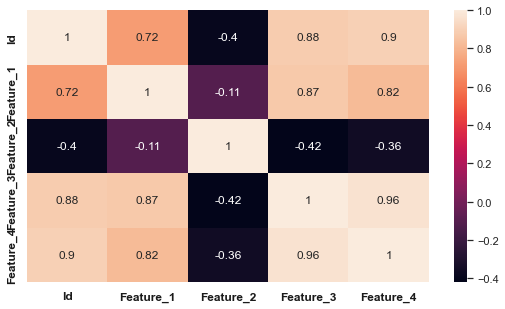

In [14]:
sns.set(rc={'figure.figsize':(9,5)})
sns.heatmap(df.corr(),annot=True)
plt.xticks(fontsize=12,color='k',fontweight='bold')
plt.yticks(fontsize=12,color='k',fontweight='bold')
plt.show()

In [15]:
df.corr()

,Id,Feature_1,Feature_2,Feature_3,Feature_4
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
Feature_1,0.716676,1.000000,-0.109369,0.871754,0.817954
Feature_2,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Feature_3,0.882747,0.871754,-0.420516,1.000000,0.962757
Feature_4,0.899759,0.817954,-0.356544,0.962757,1.000000


In [16]:
#seperating X and y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [17]:
from sklearn import tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
clftree = tree.DecisionTreeClassifier(max_depth = 3)
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV

In [19]:
#splitting into train and test 80:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [20]:
df.describe()

,Id,Feature_1,Feature_2,Feature_3,Feature_4
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Normalizing

In [21]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [22]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [23]:
X_train_std

array([[ 1.34636602,  0.61303014,  0.10850105,  0.94751783,  0.73603967],
       [ 0.16184701, -0.56776627, -0.12400121,  0.38491447,  0.34808318],
       [-1.11206965, -0.80392556,  1.03851009, -1.30289562, -1.3330616 ],
       [ 1.12287187,  0.25879121, -0.12400121,  0.60995581,  0.73603967],
       [ 1.23461894,  0.61303014, -0.58900572,  1.00377816,  1.25331499],
       [-0.39688836, -0.80392556, -0.82150798,  0.04735245,  0.21876435],
       [-1.31321439, -0.21352735,  1.73601687, -1.19037495, -1.20374277],
       [ 0.1394976 ,  0.14071157, -0.82150798,  0.72247648,  0.47740201],
       [-0.35218953,  0.02263193, -0.12400121,  0.21613346,  0.34808318],
       [ 0.34064234, -0.09544771, -1.05401024,  0.10361279, -0.03987331],
       [ 0.78763064,  1.0853487 , -0.12400121,  0.94751783,  1.12399616],
       [-1.67080503, -1.39432376,  0.34100331, -1.41541629, -1.3330616 ],
       [ 1.43576368,  1.20342834,  0.10850105,  0.72247648,  1.38263382],
       [-0.75447901, -1.04008484,  1.0

In [24]:
X_test_std

array([[ 0.83232947, -0.09544771, -0.58900572,  0.72247648,  1.51195265],
       [-0.32984012,  0.14071157, -1.98401928,  0.10361279, -0.29851096],
       [-0.97797316, -0.44968663,  2.66602591, -1.35915595, -1.3330616 ],
       [ 0.67588356,  1.6757469 , -0.35650346,  1.39760052,  0.73603967],
       [-1.55905795, -1.04008484,  0.80600783, -1.30289562, -1.3330616 ],
       [ 0.51943766,  0.49495049,  0.57350557,  1.22881951,  1.64127148],
       [-0.82152725, -1.04008484,  1.03851009, -1.41541629, -1.20374277],
       [ 0.20654585,  0.96726906,  0.10850105,  0.49743514,  0.34808318],
       [-0.01694831,  1.0853487 , -0.58900572,  0.55369548,  0.21876435],
       [-0.12869538,  0.25879121, -0.58900572,  0.10361279,  0.08944552],
       [ 1.27931777,  0.25879121, -1.05401024,  1.00377816,  0.21876435],
       [-0.57568369,  0.61303014,  0.34100331,  0.38491447,  0.34808318],
       [-0.08399655,  0.25879121, -0.58900572,  0.49743514, -0.03987331],
       [-0.50863544,  0.73110978, -0.5

# Model Building

In [25]:
#initial model 
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [26]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [28]:
f1_score(y_test,y_pred, average='micro')

0.9666666666666667

In [29]:
precision_score(y_test,y_pred, average='micro')

0.9666666666666667

In [30]:
recall_score(y_test,y_pred, average='micro')

0.9666666666666667

In [31]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [32]:
y_test_pred

array(['Class_3', 'Class_2', 'Class_1', 'Class_3', 'Class_1', 'Class_2',
       'Class_1', 'Class_2', 'Class_2', 'Class_2', 'Class_3', 'Class_2',
       'Class_2', 'Class_2', 'Class_2', 'Class_1', 'Class_2', 'Class_2',
       'Class_1', 'Class_1', 'Class_3', 'Class_2', 'Class_1', 'Class_1',
       'Class_3', 'Class_1', 'Class_1', 'Class_2', 'Class_2', 'Class_1'],
      dtype=object)

# Model evaluation, confusion matrix

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

In [35]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [36]:
accuracy_score(y_test, y_test_pred)

0.9666666666666667